# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [30]:
# Import the appropriate libraries with aliases
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
# Create two new dataframes
north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv('SouthCallCenter.csv')
south_df.head()


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

#### EDA Question 1A:  How many reps are in the North branch?  

In [31]:
#Code Used:
distinct_count = north_df['Rep ID'].nunique()

print("The number of reps at north branch':", distinct_count)

The number of reps at north branch': 9


#### EDA Question 1B:  How many reps are in the South branch?  

In [32]:
#Code Used:
south_distinct_count = south_df['Rep ID'].nunique()

print("The number of reps at south branch:", south_distinct_count)

The number of reps at south branch: 11


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [33]:
#Code Used:
north_df[['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time']].mean()

Busy Minutes             9.987755
Not Ready Minutes        1.914286
Incoming Wait Time       3.048780
During Call Wait Time    2.967347
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [34]:
#Code Used:
south_df[['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time']].mean()

Busy Minutes             10.054140
Not Ready Minutes         1.910828
Incoming Wait Time        3.000000
During Call Wait Time     3.076433
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [35]:
# Code Used:
calls_by_time_block_south = south_df.groupby('Time Block')['Calls'].sum()
calls_by_time_block_north = north_df.groupby('Time Block')['Calls'].sum()
calls_by_time_block_allbranches = calls_by_time_block_south.add(calls_by_time_block_north, fill_value=0)
print(calls_by_time_block_allbranches)

Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Calls, dtype: int64


##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05 
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: There is missing data in "Incoming Wait Time." Since the distribution is even with no significant outliers, I applied a mean to the outliers. I could also replace missing values with a constant value "Missing" or remove the entries. Since this is a signficant variable in the analysis, I don't think we should remove them. If I had access to the source of the data, I might clarify why the nulls appear. Does this indiciate a "0" value?

In [36]:
# Code Used
# Add Additional Cells as needed.
north_df.isna().sum()


Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64

In [37]:
north_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

In [38]:
print(north_df.isna)
#NaN values are for outgoing calls. Will replace NaN with '0'

<bound method DataFrame.isna of      Unnamed: 0 Branch     Call Purpose Time Block Incoming or Outgoing Queue  \
0             0  North        Complaint    9:00 AM             Incoming     B   
1             1  North    Sales Support   11:00 AM             Incoming     A   
2             2  North    Sales Support   11:00 AM             Incoming     B   
3             3  North    Sales Support    4:00 PM             Incoming     B   
4             4  North  Product Support   12:00 PM             Incoming     B   
..          ...    ...              ...        ...                  ...   ...   
240         240  North  Product Support    5:00 PM             Outgoing     B   
241         241  North  Product Support    5:00 PM             Outgoing     A   
242         242  North  Product Support    5:00 PM             Outgoing     A   
243         243  North  Product Support    5:00 PM             Outgoing     A   
244         244  North  Product Support    5:00 PM             Outgoing     B

In [39]:
north_df['Incoming Wait Time'] = north_df['Incoming Wait Time'].fillna(0)
#replace NaN values with 0

In [40]:
north_df.isna().sum()

Unnamed: 0               0
Branch                   0
Call Purpose             0
Time Block               0
Incoming or Outgoing     0
Queue                    0
Rep ID                   0
Sale                     0
Lost Call                0
Abandoned                0
Busy Minutes             0
Not Ready Minutes        0
Incoming Wait Time       0
During Call Wait Time    0
Calls                    0
dtype: int64

In [41]:
south_df['Incoming Wait Time'] = south_df['Incoming Wait Time'].fillna(0)
#will do the same for south branch

In [42]:
south_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             314 non-null    int64  
 1   Branch                 314 non-null    object 
 2   Call Purpose           314 non-null    object 
 3   Time Block             314 non-null    object 
 4   Incoming or Outgoing   314 non-null    object 
 5   Queue                  314 non-null    object 
 6   Rep ID                 314 non-null    object 
 7   Sale                   314 non-null    object 
 8   Lost Call              314 non-null    int64  
 9   Abandoned              314 non-null    int64  
 10  Busy Minutes           314 non-null    int64  
 11  Not Ready Minutes      314 non-null    int64  
 12  Incoming Wait Time     314 non-null    float64
 13  During Call Wait Time  314 non-null    int64  
 14  Calls                  314 non-null    int64  
dtypes: flo

#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: There appears to be an extra space in some "Yes" values. I'll use strip method to remove. 

In [43]:
#Code Used
# Add Additional Cells as needed.
distinct_sales = north_df['Sale'].unique()
print(distinct_sales)

['NO' 'YES ' 'YES']


In [44]:
north_df['Sale'] = north_df['Sale'].str.strip().replace({'YES ': 'YES'})


distinct_sales = north_df['Sale'].unique()
print(distinct_sales)

['NO' 'YES']


#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: There are no duplicated rows in either data sets. 

In [45]:
#Code Used
# Add Additional Cells as needed.
duplicate_rows_north_df = north_df[north_df.duplicated()]
print("Number of duplicated rows: ", duplicate_rows_north_df.shape)

Number of duplicated rows:  (0, 15)


In [46]:
#Code Used
# Add Additional Cells as needed.
duplicate_rows_south_df = south_df[south_df.duplicated()]
print("Number of duplicated rows: ", duplicate_rows_south_df.shape)

Number of duplicated rows:  (0, 15)


#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: I checked to see if there were any variables with over 95% being the same value. All seem important for the analysis despite similar value. However, Unnamed doesn't seem to add value as it matches the index values. Will drop "Unnamed"

In [47]:
#Code Used
# Add Additional Cells as needed.

num_rows = len(north_df.index)
low_information_cols = [] #

for col in north_df.columns:
    cnts = north_df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Branch: 100.00000%
North    245
Name: Branch, dtype: int64

Sale: 95.51020%
NO     234
YES     11
Name: Sale, dtype: int64

Lost Call: 97.95918%
0    240
1      5
Name: Lost Call, dtype: int64

Abandoned: 97.14286%
0    238
1      7
Name: Abandoned, dtype: int64

Calls: 100.00000%
1    245
Name: Calls, dtype: int64



In [48]:
north_df = north_df.drop('Unnamed: 0',axis=1)
north_df.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [49]:
#Code Used
# Add Additional Cells as needed.

num_rows = len(south_df.index)
low_information_cols = [] #

for col in south_df.columns:
    cnts = south_df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Branch: 100.00000%
South    314
Name: Branch, dtype: int64

Sale: 98.08917%
NO     308
YES      6
Name: Sale, dtype: int64

Lost Call: 96.49682%
0    303
1     11
Name: Lost Call, dtype: int64

Abandoned: 98.72611%
0    310
1      4
Name: Abandoned, dtype: int64

Calls: 100.00000%
1    314
Name: Calls, dtype: int64



In [50]:
south_df = south_df.drop('Unnamed: 0',axis=1)
south_df.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [51]:
# Create dataframe for the entire company named df
df = pd.concat([north_df, south_df], ignore_index=True)
df.head()

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [52]:
df['Incoming Wait Time'].describe()

count    559.000000
mean       1.123435
std        1.680845
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max        5.000000
Name: Incoming Wait Time, dtype: float64

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Brent, 37
- South Branch = Eric, 35


In [68]:
# Code Used
# Add Additional Cells as needed.
grouped_df = df.groupby(["Branch", "Rep ID"],as_index=False).sum(numeric_only=True)

sorted_df = grouped_df.sort_values(by=["Branch", "Calls"], ascending=[True, False])
result_df = sorted_df[["Branch", "Rep ID", "Calls"]]
print(result_df) 

   Branch  Rep ID  Calls
2   North   Brent     37
6   North   Lilly     30
4   North    Duke     29
7   North    Todd     29
5   North     Joe     26
3   North     Cam     24
8   North  Xander     24
0   North  Amanda     23
1   North    Andy     23
10  South    Eric     35
16  South   Randy     33
17  South   Sandy     32
12  South   Helga     31
11  South  George     29
15  South    Kate     29
14  South    Karl     28
13  South    Josh     26
19  South   Susan     26
18  South  Sharon     25
9   South   Alice     20


#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%? No, but North branch has the highest, more than double south branch

In [54]:
# Code Used
# Add Additional Cells as needed.

branch_totals = df.groupby("Branch")[["Calls", "Abandoned"]].sum()


In [55]:
branch_totals["Abandonment Rate"] = (branch_totals["Abandoned"] / branch_totals["Calls"]) * 100

In [56]:
company_totals = df[["Calls", "Abandoned"]].sum()

In [57]:
company_abandonment_rate = (company_totals["Abandoned"] / company_totals["Calls"]) * 100

In [58]:
print("Average Call Abandonment Rate for North branch: {:.2f}%".format(branch_totals.loc["North", "Abandonment Rate"]))
print("Average Call Abandonment Rate for South branch: {:.2f}%".format(branch_totals.loc["South", "Abandonment Rate"]))
print("Average Call Abandonment Rate for the whole company: {:.2f}%".format(company_abandonment_rate))

Average Call Abandonment Rate for North branch: 2.86%
Average Call Abandonment Rate for South branch: 1.27%
Average Call Abandonment Rate for the whole company: 1.97%


#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24%, 33 incoming calls
- South Branch = 38.10%, 48 incoming calls
- Company Wide = 38.94%, 81 incoming calls

In [75]:
# Code Used
# Add Additional Cells as needed.

answered_within_2_seconds = df[(df["Incoming Wait Time"] <= 2) & (df["Incoming or Outgoing"] != "Outgoing")]
branch_totals = answered_within_2_seconds.groupby("Branch")["Calls"].count()
total_calls_by_branch = df[df["Incoming or Outgoing"] != "Outgoing"].groupby("Branch")["Calls"].count()
print(branch_totals)

Branch
North    33
South    48
Name: Calls, dtype: int64


In [76]:
branch_service_level = (branch_totals / total_calls_by_branch) * 100

In [77]:
total_calls = df[df["Incoming or Outgoing"] != "Outgoing"]["Calls"].count()
total_calls_answered_within_2_seconds = answered_within_2_seconds["Calls"].count()
print(total_calls_answered_within_2_seconds)


81


In [78]:
company_service_level = (total_calls_answered_within_2_seconds / total_calls) * 100

In [79]:
print("Percentage of calls answered within 2 seconds for North branch: {:.2f}%".format(branch_service_level.loc["North"]))
print("Percentage of calls answered within 2 seconds for South branch: {:.2f}%".format(branch_service_level.loc["South"]))
print("Percentage of calls answered within 2 seconds for the whole company: {:.2f}%".format(company_service_level))

Percentage of calls answered within 2 seconds for North branch: 40.24%
Percentage of calls answered within 2 seconds for South branch: 38.10%
Percentage of calls answered within 2 seconds for the whole company: 38.94%


### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05 seconds
- South Branch in seconds = 3.00 seconds
- Company Wide in seconds = 3.02 seconds


In [80]:
# Code Used 
branch_average_speed_of_answer = df[df["Incoming or Outgoing"] != "Outgoing"].groupby("Branch")["Incoming Wait Time"].mean()

In [81]:
total_incoming_calls = df[df["Incoming or Outgoing"] != "Outgoing"]["Calls"].count()
total_incoming_wait_time = df[df["Incoming or Outgoing"] != "Outgoing"]["Incoming Wait Time"].sum()

In [82]:
company_average_speed_of_answer = total_incoming_wait_time / total_calls

In [83]:
print("Average Speed of Answer for North branch: {:.2f} seconds".format(branch_average_speed_of_answer.loc["North"]))
print("Average Speed of Answer for South branch: {:.2f} seconds".format(branch_average_speed_of_answer.loc["South"]))
print("Average Speed of Answer for the whole company: {:.2f} seconds".format(company_average_speed_of_answer))

Average Speed of Answer for North branch: 3.05 seconds
Average Speed of Answer for South branch: 3.00 seconds
Average Speed of Answer for the whole company: 3.02 seconds


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: I created a bar chart to show comparisons between the different queues, in this case, abandonment rates. This chart makes sense for comparisons of categorical data for easier view. 

C:\Users\kkoehler\AppData\Local\Temp\ipykernel_106280\2996211633.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  queue_dict = df.groupby("Queue").agg("sum")


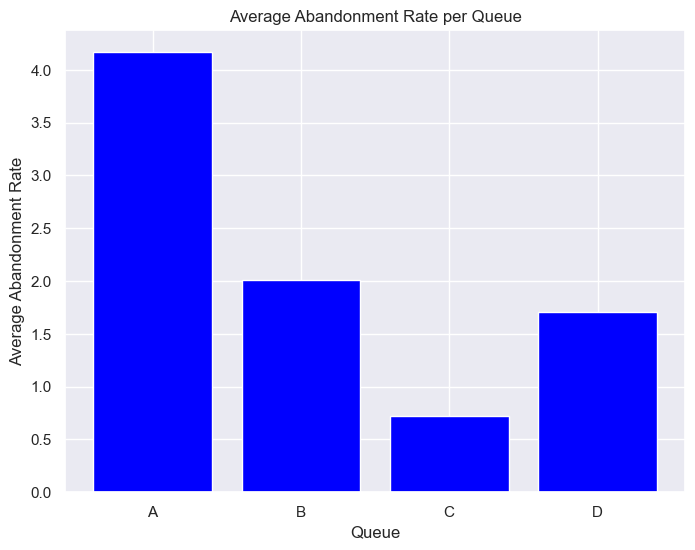

In [84]:
# Create visualization 1 here
# Import any additional libraries needed with alias



# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your Code Here:

abandonment_rates_percentage = {queue: rate * 100 for queue, rate in abandonment_rates.items()}
plt.figure(figsize=(8, 6))
plt.bar(abandonment_rates_percentage.keys(), abandonment_rates_percentage.values(), color='blue')

plt.xlabel("Queue")
plt.ylabel("Average Abandonment Rate")
plt.title("Average Abandonment Rate per Queue")

plt.show()

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: I used subplot bar charts for both visualizations since we were showing comparisons between reps for both service level and average response time. Subplot allows for easier comparison through side-by-side charts.

In [91]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df[north_df["Incoming or Outgoing"] == "Incoming"].groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[(north_df["Incoming Wait Time"] <= 2.0) & (north_df["Incoming or Outgoing"] == "Incoming")]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:
service_level.head()


,Calls_x,Calls_y,Service Level %
Rep ID,,,
Amanda,3,5,60.000000
Andy,3,10,30.000000
Brent,6,8,75.000000
Cam,5,11,45.454545
Duke,6,14,42.857143


In [87]:
print(service_level.columns)

Index(['Calls_x', 'Calls_y', 'Service Level %'], dtype='object')


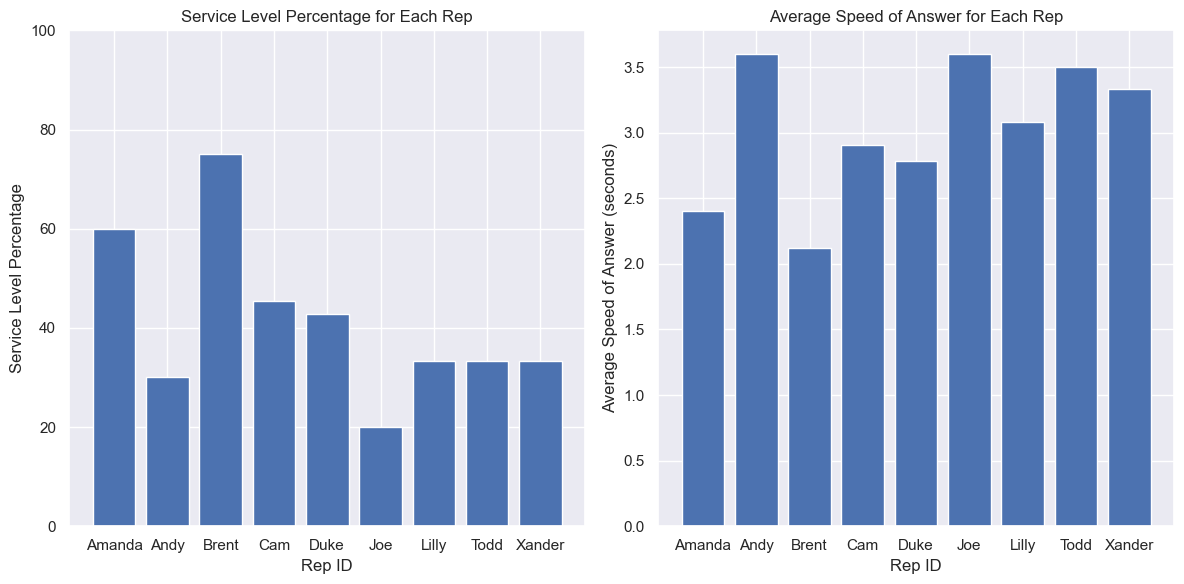

In [92]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(service_level.index, service_level["Service Level %"])
plt.xlabel("Rep ID")
plt.ylabel("Service Level Percentage")
plt.title("Service Level Percentage for Each Rep")
plt.ylim(0, 100)

plt.subplot(1, 2, 2)
plt.bar(north_plt["Rep ID"], north_plt["Incoming Wait Time"])
plt.xlabel("Rep ID")
plt.ylabel("Average Speed of Answer (seconds)")
plt.title("Average Speed of Answer for Each Rep")

plt.tight_layout()
plt.show()

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose a stacked bar plot to show how the various categories calls break down between outgoing and incoming. I think showing this in a stacked bar makes sense so you can see how the calls add up to the total. We also see a clear comparison between the 3 types of call purpose.Another option could be grouped bar charts. 

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64


<Figure size 1000x600 with 0 Axes>

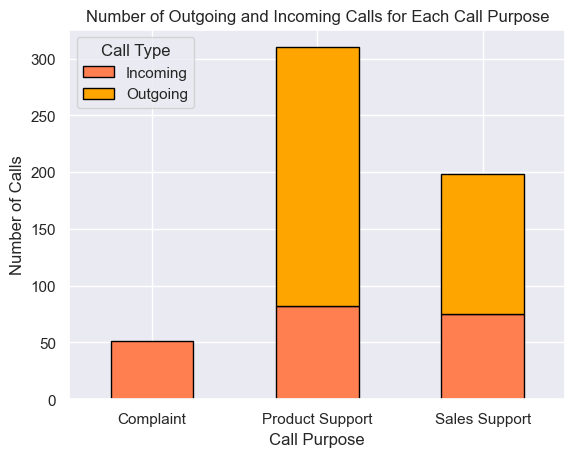

In [46]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:

pivot_df = purpose_counts.unstack().fillna(0)
plt.figure(figsize=(10, 6))
pivot_df.plot(kind='bar', stacked=True, color=['coral', 'orange'], edgecolor='black')

plt.xlabel("Call Purpose")
plt.ylabel("Number of Calls")
plt.title("Number of Outgoing and Incoming Calls for Each Call Purpose")

plt.legend(title='Call Type', loc='upper left', labels=['Incoming', 'Outgoing'])
plt.xticks(rotation=0)
plt.show()

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: 
The south branch because it has a lower average abandonment rate, quicker average speed of answer and higher service level. 


#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: The north branch would benefit from extra help. They have fewer reps total and lower KPIs, indicating the number of calls received is too high for the number of reps. Adding some extra help might improve KPIs.


#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: Often these calls end with some sort of customer satisfaction survey. A simple rating demonstrating overall satisfaction would be helpful to understand how successful the reps are even beyond the objective numbers (waiting time, etc.). This could have impact on determining which branch would benefit from additional help. 


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: I used a grouped bar plot since we are comparing multiple categories of call purpose by each time block. The hue parameter creates different groups of Call Purpose to show the different values. 

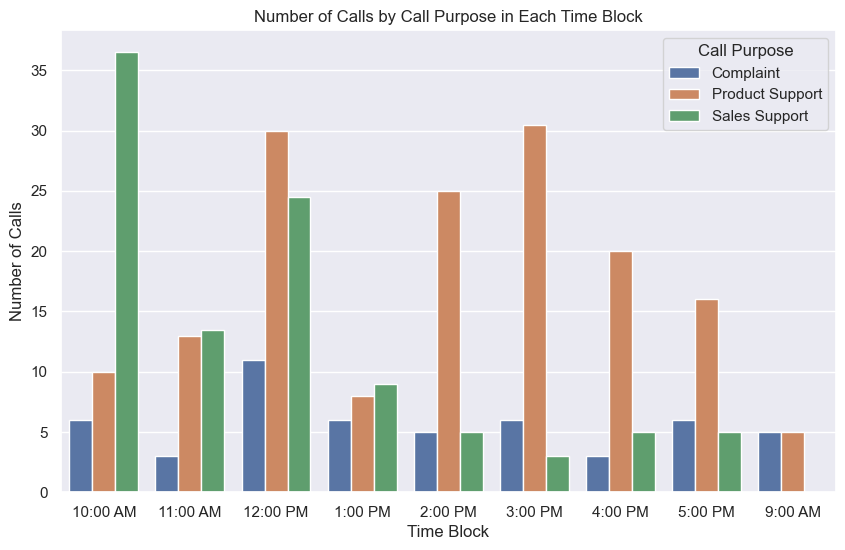

In [51]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

call_times_grouped = df.groupby(["Call Purpose", "Time Block", "Incoming or Outgoing"])["Calls"].sum().reset_index()


# Use groupby and get_group to select which call purpose to plot:

plt.figure(figsize=(10, 6))
sns.barplot(data=call_times_grouped, x="Time Block", y="Calls", hue="Call Purpose", errorbar=None)

plt.xlabel("Time Block")
plt.ylabel("Number of Calls")
plt.title("Number of Calls by Call Purpose in Each Time Block")

plt.legend(title="Call Purpose")
plt.show()